In [1]:
from qiskit import IBMQ, pulse
from qiskit.pulse import library
from qiskit.pulse.macros import measure
from qiskit.ignis.characterization import update_u_gates, get_single_q_pulse

In [2]:
IBMQ.load_account()

/home/pyserver/miniconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Create function to modify the inst_map

In [3]:
# function for modify the parameters
def tune_x_param(params, c1):
    """  (eg) C1 = 2 = ratio to extend duration & sigma
     X pulse ==>
        inst.pulse = Drag(duration=640, amp=(0.6472753752719002+0j), sigma=160, beta=-4.631873857015726)
        inst.pulse.parameters  = {'duration': 640, 'amp': (0.6472753752719002+0j), 'sigma': 160, 'beta': -4.631873857015726}
    """
    params['sigma'] = params['sigma'] * c1
    params['amp']   = params['amp'] / c1
    params['duration'] = params['duration'] * c1
    #print(params)
    return params

In [5]:
backend_real = IBMQ.providers()[0].backends(open_pulse=True)[0]
# backend_real.defaults().to_dict()['cmd_def']

In [6]:
inst_map = backend_real.defaults().instruction_schedule_map
# u2_sched = inst_map.get('u2', 0, P0=1, P1=1)
u3_sched = inst_map.get('u3', 0, P0=1, P1=1, P2=1)
# print(u2_sched)
print(u3_sched)
t0, inst_u3 = u3_sched.instructions[1]
print(inst_u3)
origin_params = inst_u3.pulse.parameters
print(origin_params)


Schedule((0, ShiftPhase(-1.0, DriveChannel(0))), (0, Play(Drag(duration=640, amp=(0.3150006345549874-0.010766051747928145j), sigma=160, beta=-3.8774242248546673), DriveChannel(0))), (640, ShiftPhase(-1.0, DriveChannel(0))), (640, Play(Drag(duration=640, amp=(-0.3150006345549874+0.010766051747928182j), sigma=160, beta=-3.8774242248546673), DriveChannel(0))), (1280, ShiftPhase(-1.0, DriveChannel(0))), name="u3")
Play(Drag(duration=640, amp=(0.3150006345549874-0.010766051747928145j), sigma=160, beta=-3.8774242248546673), DriveChannel(0))
{'duration': 640, 'amp': (0.3150006345549874-0.010766051747928145j), 'sigma': 160, 'beta': -3.8774242248546673}


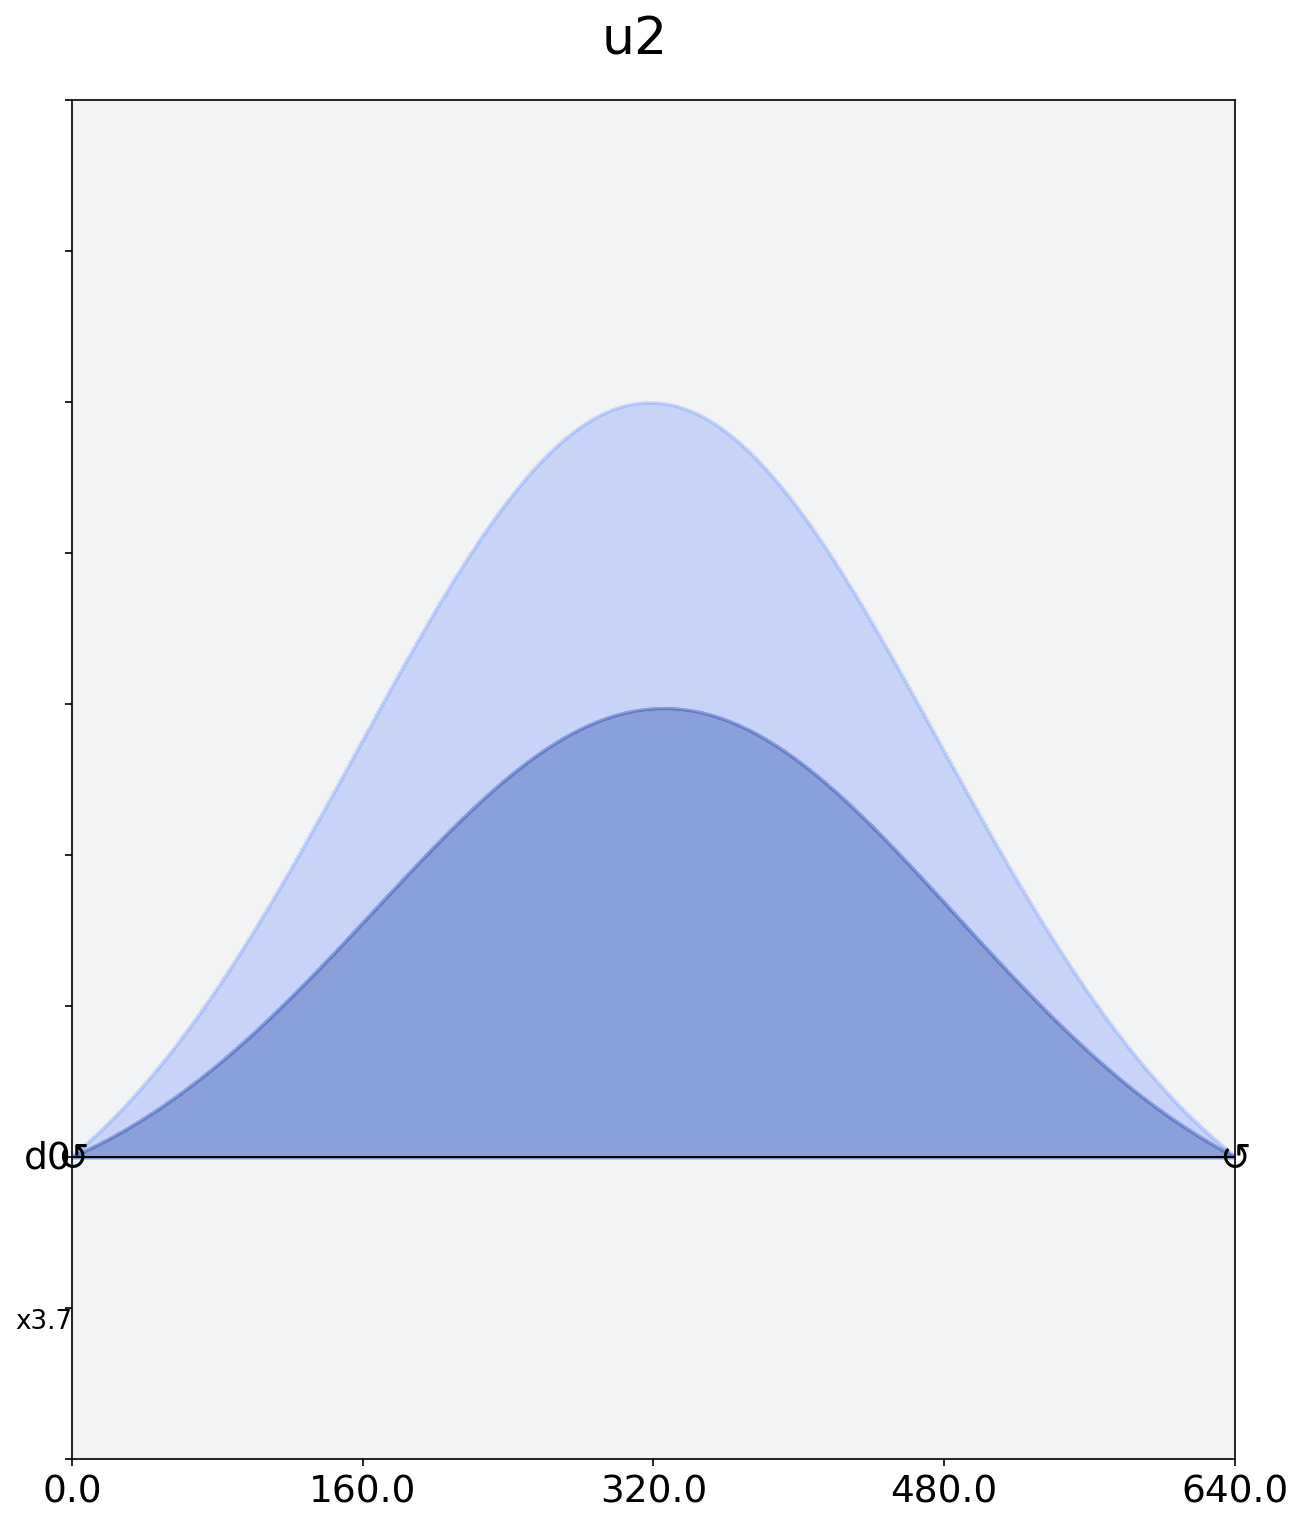

In [7]:
# plot the original inst_map to check later
inst_map.get('u2', 0, P0=1, P1=1).draw()

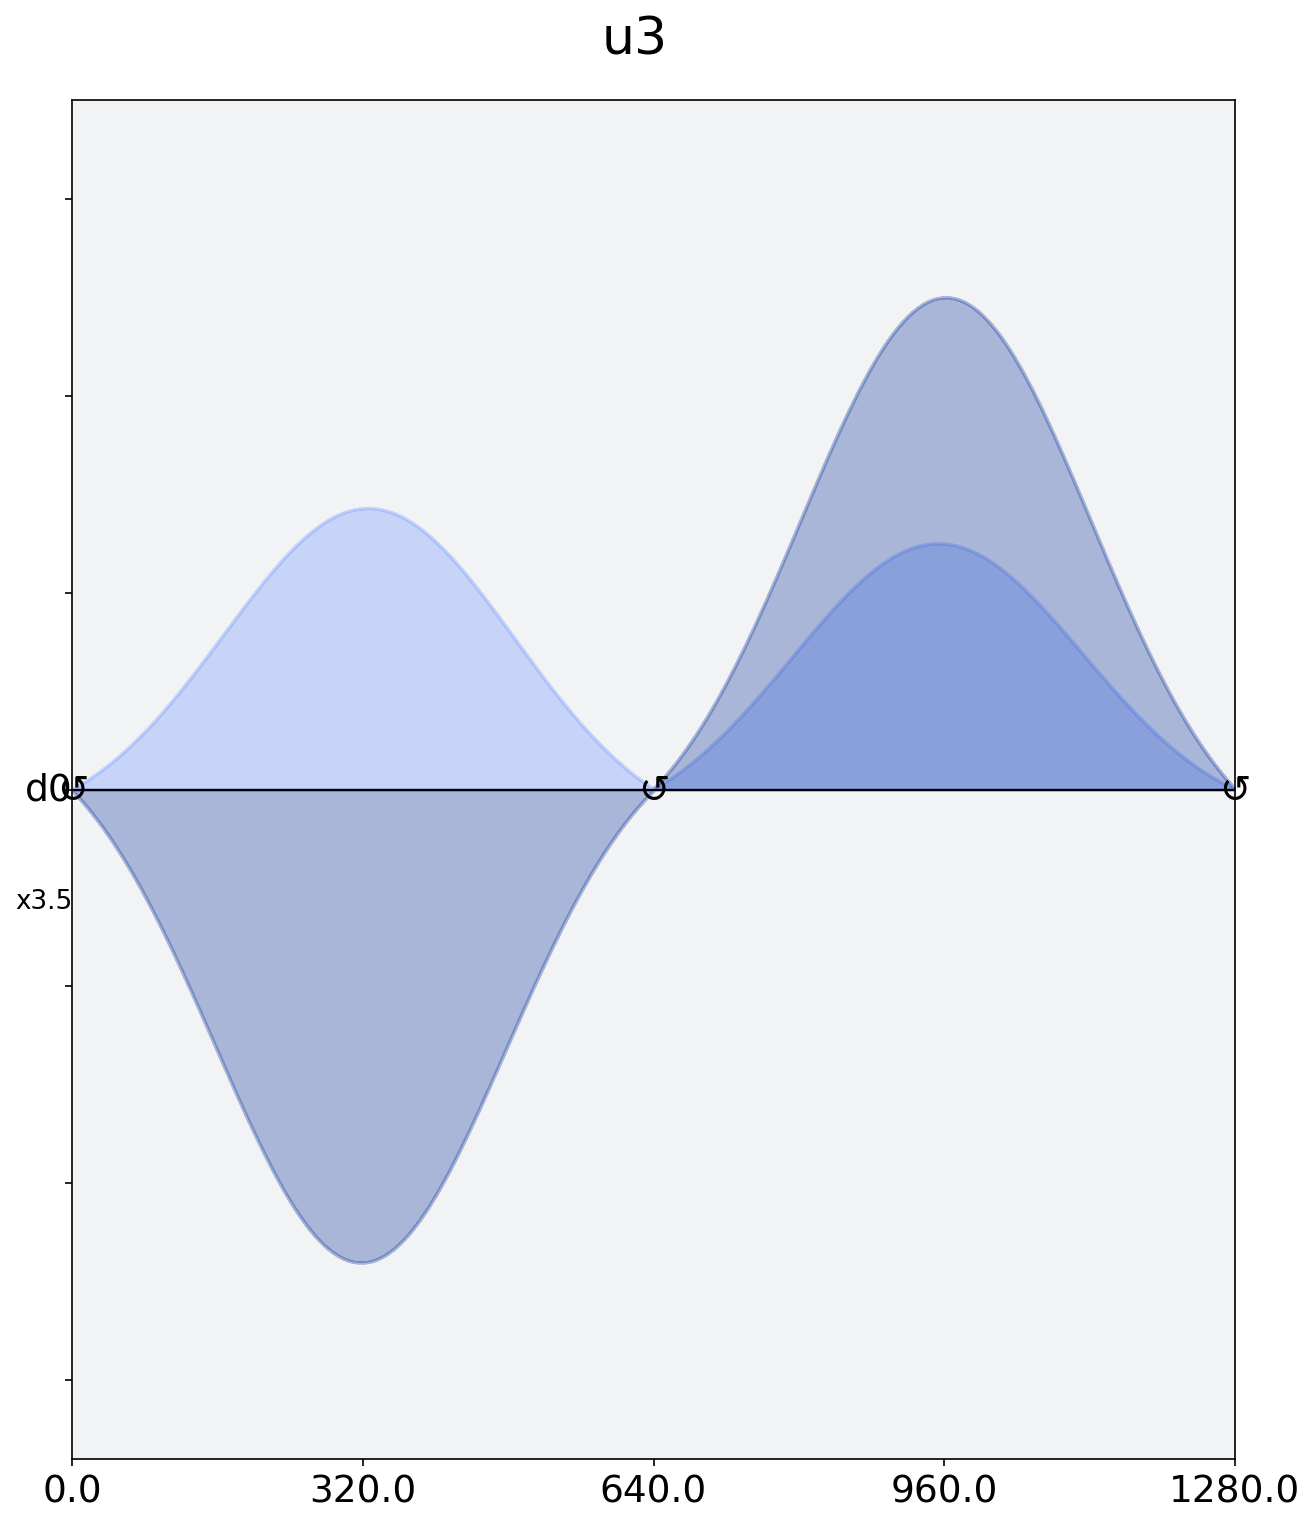

In [8]:
inst_map.get('u3', 0, P0=1, P1=1, P2=1).draw()

In [9]:
# modify the parameters
ci = 2
mod_params = tune_x_param(origin_params, ci)
print(mod_params)

{'duration': 1280, 'amp': (0.1575003172774937-0.005383025873964073j), 'sigma': 320, 'beta': -3.8774242248546673}


In [10]:
qubit = [0]
update_u_gates([mod_params], None, qubit, inst_map, [pulse.DriveChannel(qubit[0])])

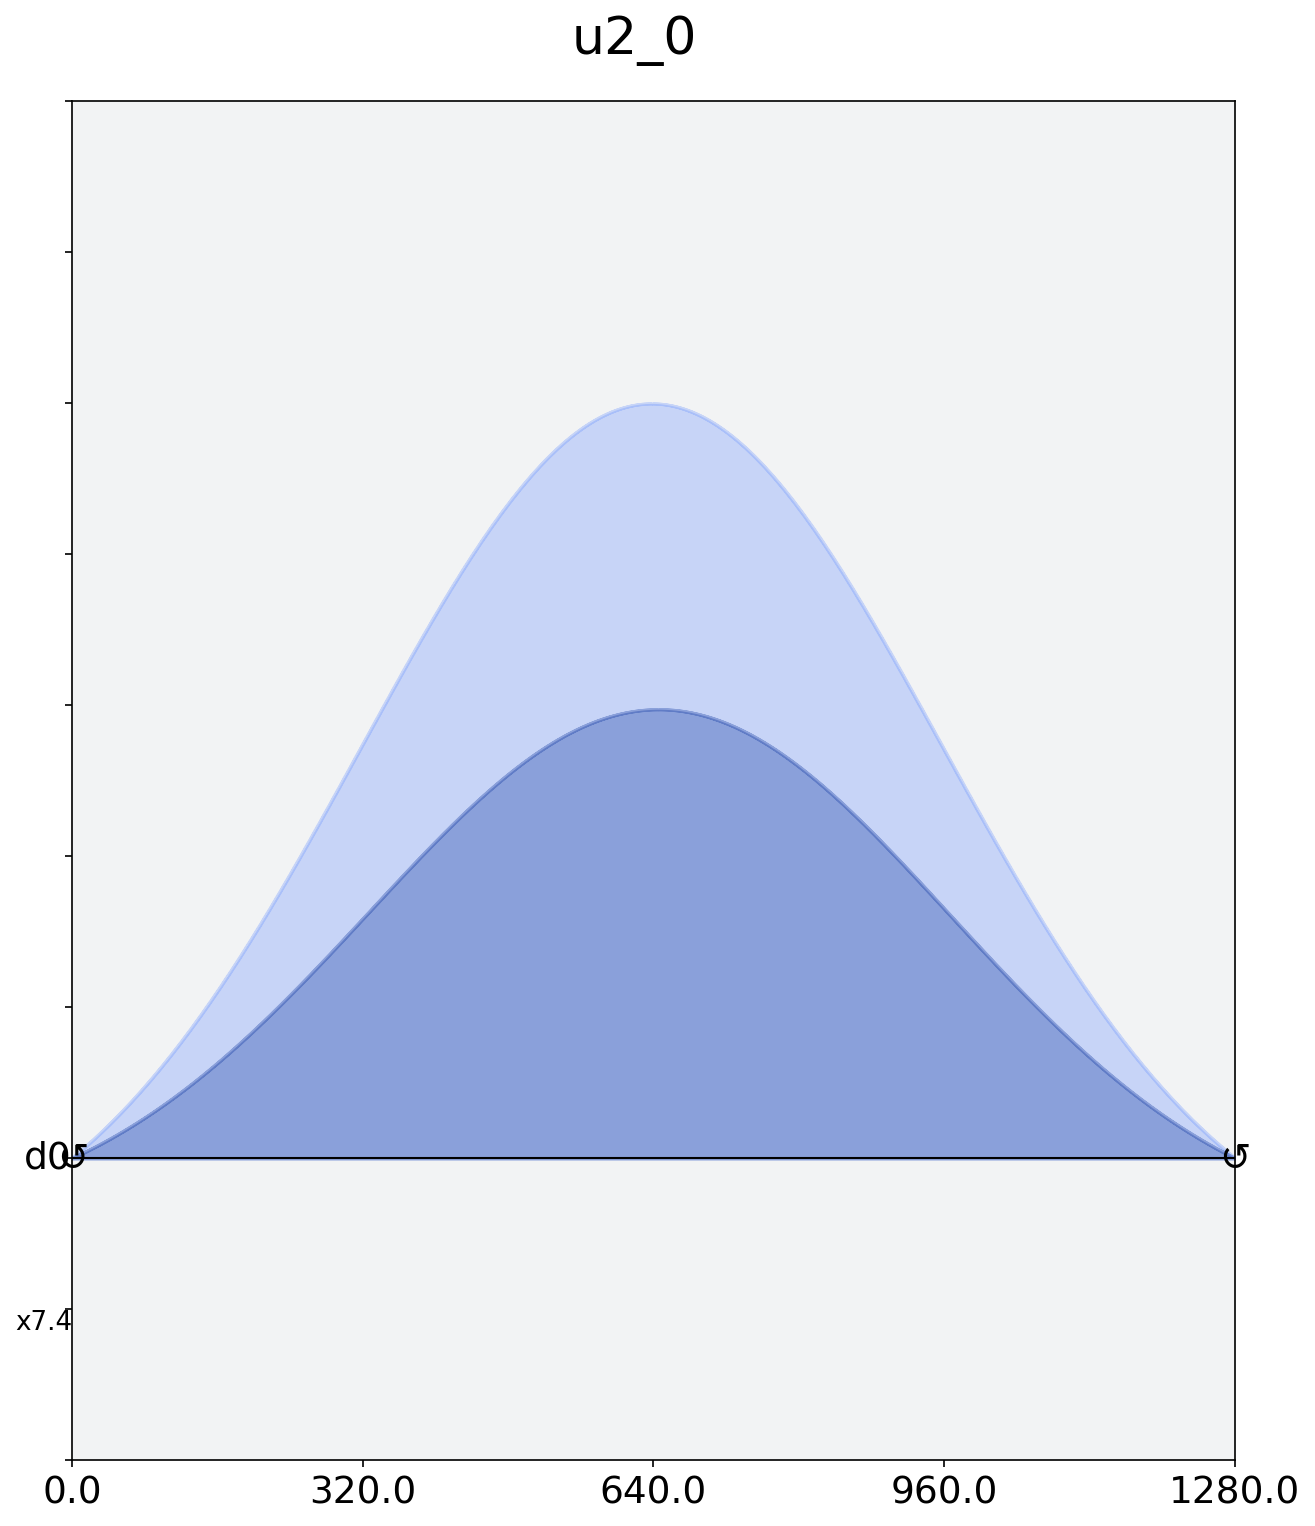

In [11]:
# check the new inst_map is correct
inst_map.get('u2', 0, P0=1, P1=1).draw()

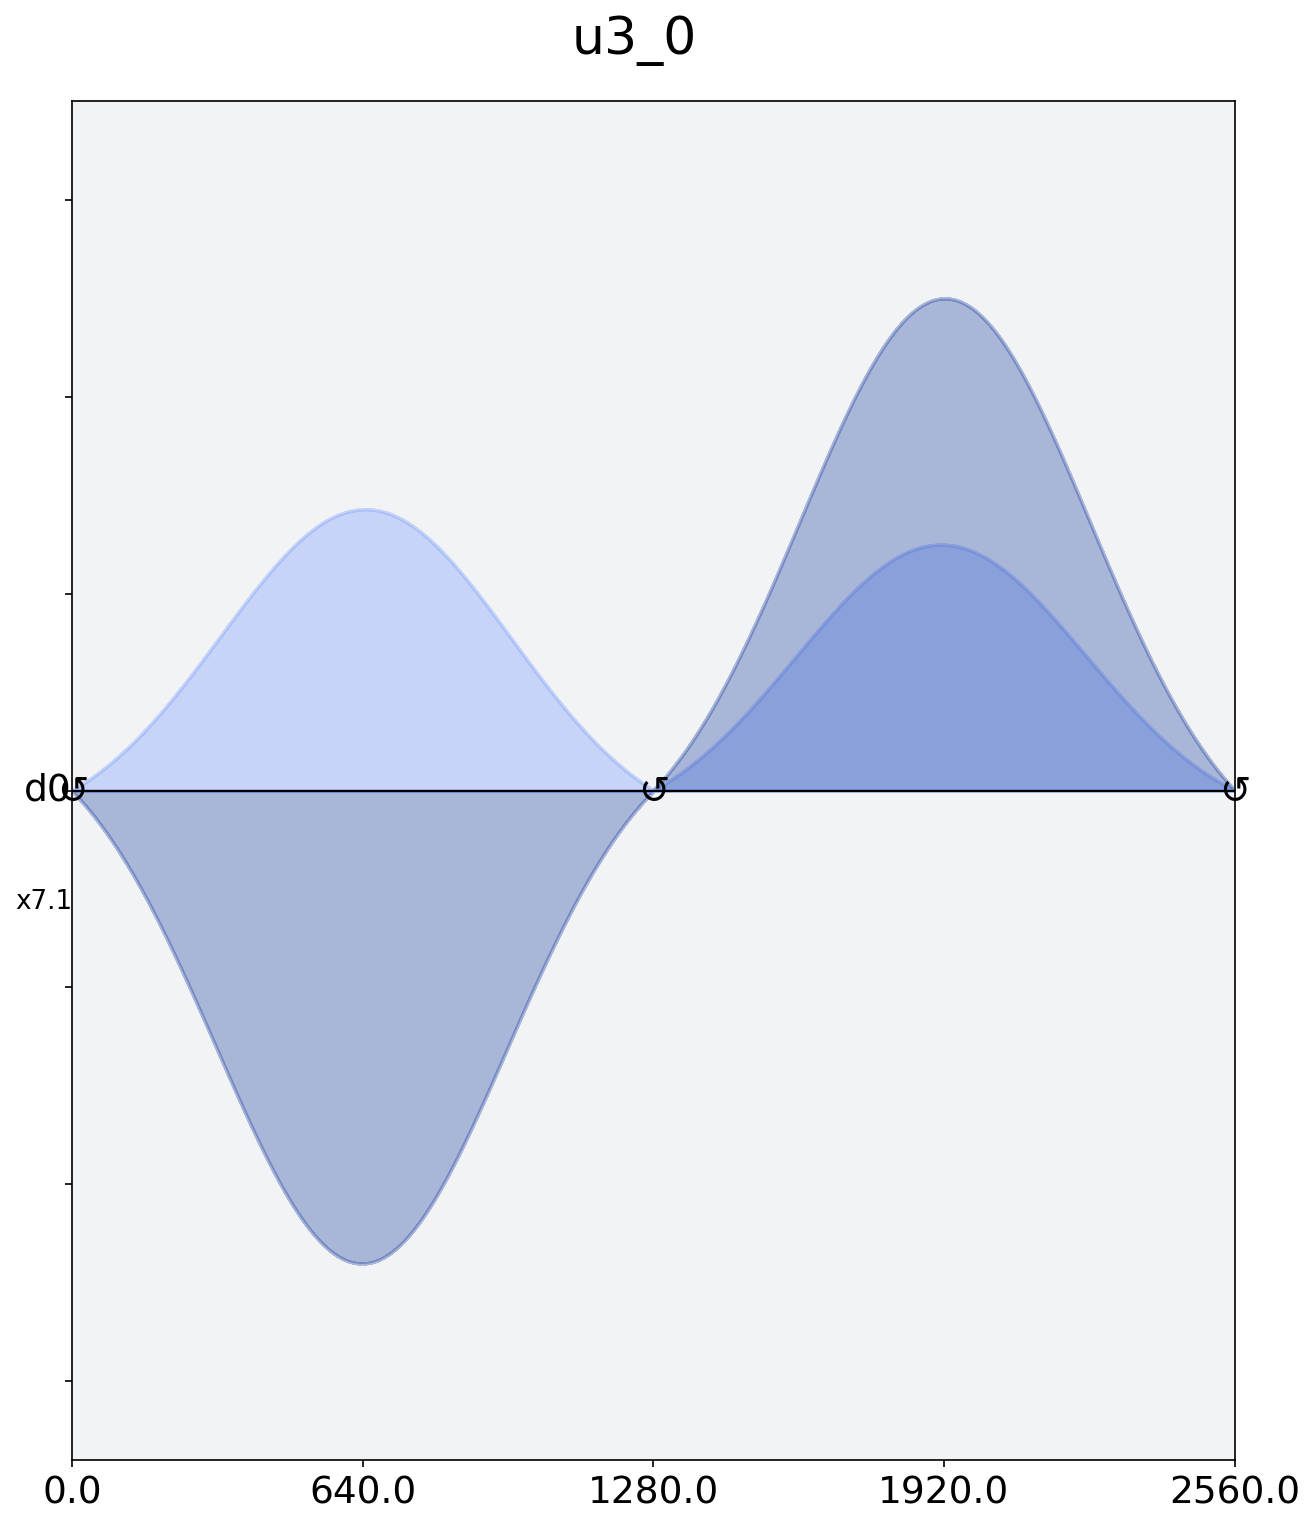

In [12]:
inst_map.get('u3', 0, P0=1, P1=1, P2=1).draw()
